In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.ExcelFile('ad_ranking_clean.xlsx')
ads = pd.read_excel(data, sheet_name='Ads', header=0)
mods = pd.read_excel(data, sheet_name='Mods', header=0)

In [3]:
mods["real_productivity"] = mods["Productivity"] - mods["Utilisation %"]

In [4]:
mods.head()

,moderator,market,Productivity,Utilisation %,handling time,accuracy,real_productivity
0,1689841547143170,"[""SA"", ""OM"", ""BH"", ""QA"", ""JO"", ""IQ"", ""KW"", ""EG...",286.217674,0.812403,123549,-,285.405271
1,1686755036370945,"[""RO""]",174.560000,0.704833,25547,0.959,173.855167
2,1741913197768705,"[""VN""]",334.376000,0.819167,50794,1,333.556833
3,1743415203890193,"[""MX"", ""UY"", ""CL"", ""AR"", ""CO"", ""EC"", ""PE"", ""BR""]",452.277500,0.775474,89626,0.941,451.502026
4,1710346282427393,"[""PH""]",612.312500,0.843229,98066,0.887,611.469271


In [5]:
mods.rename(columns={" accuracy ": "accuracy"}, inplace=True)

In [6]:
mods = mods[mods["accuracy"] != "-"]
mods = mods[mods["accuracy"] != '                 -  ']

# Remove rows with NaN values in the "accuracy" column
mods.dropna(subset=["accuracy"], inplace=True)

mods.reset_index(drop=True, inplace=True)

In [7]:
Weight_Real_Productivity = 0.4
Weight_Accuracy = 0.45
Weight_Handling_Time = 0.15

mods["score"] = (Weight_Real_Productivity * mods["real_productivity"]) + (Weight_Accuracy * mods["accuracy"]) / (Weight_Handling_Time * mods["handling time"])

In [8]:
mods["score"]

0        69.542179
1       133.422792
2       180.600842
3       244.587735
4       116.660517
           ...    
1270    109.028418
1271     72.025845
1272    216.587687
1273    128.046823
1274    112.966133
Name: score, Length: 1275, dtype: object

In [9]:
min_score = mods["score"].min()
max_score = mods["score"].max()

# Apply Min-Max scaling to the "Score" column
mods["normalized_score"] = (mods["score"] - min_score) / (max_score - min_score)

# Display the DataFrame with the normalized "Score" column
mods["normalized_score"]

0       0.131076
1       0.251886
2       0.341108
3       0.462118
4       0.220185
          ...   
1270    0.205752
1271    0.135773
1272    0.409165
1273    0.241719
1274    0.213198
Name: normalized_score, Length: 1275, dtype: object

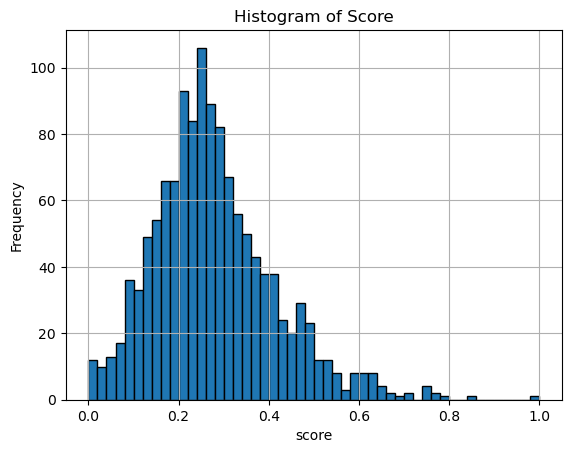

In [10]:
plt.hist(mods["normalized_score"], bins=50, edgecolor='k')
plt.xlabel("score")
plt.ylabel("Frequency")
plt.title("Histogram of Score")
plt.grid(True)

# Show the histogram
plt.show()

In [11]:
max_score = mods["score"].max()

# Find the row(s) where the maximum value occurs
max_score_rows = mods[mods["score"] == max_score]

In [12]:
max_score_rows

,moderator,market,Productivity,Utilisation %,handling time,accuracy,real_productivity,score,normalized_score
200,6073125,"[""JP""]",1323.355,0.844198,98155,0.911,1322.510802,529.004349,1.0
